# The Sparks Foundation

# Task 3: Prediction using Decision Tree Algorithm 

## `1.` Data Wrangling

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## `2.` Data Cleaning

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
counts = iris['Species'].value_counts()
counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## `3.` Data Visualization

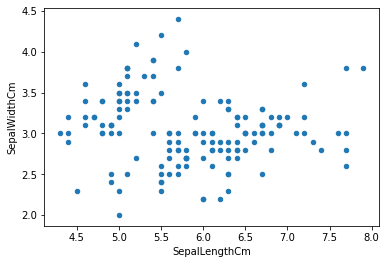

In [12]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


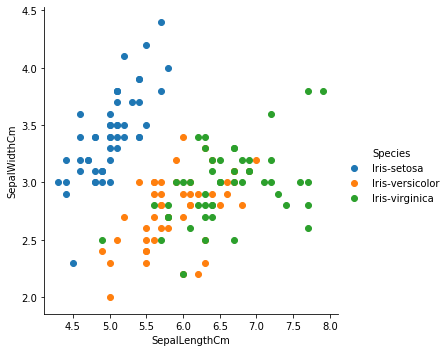

In [13]:
sb.FacetGrid(iris, hue = "Species", size = 5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

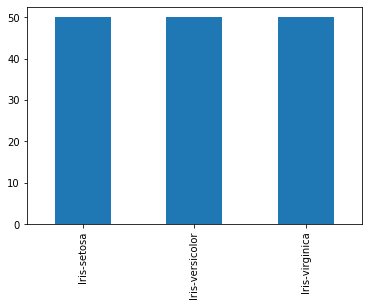

In [14]:
counts.plot(kind = 'bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012C6A825A08>,
      dtype=object)

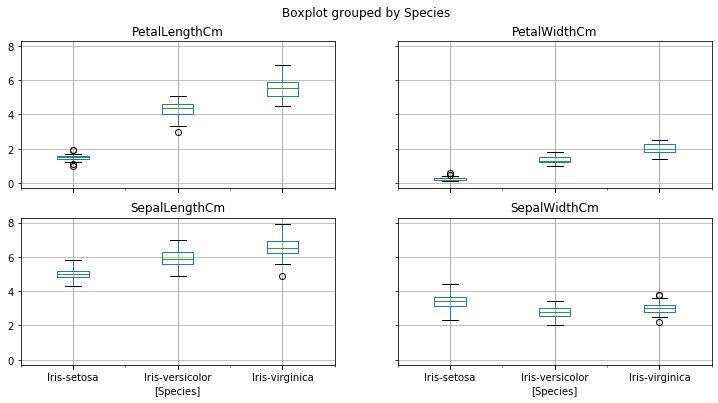

In [15]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

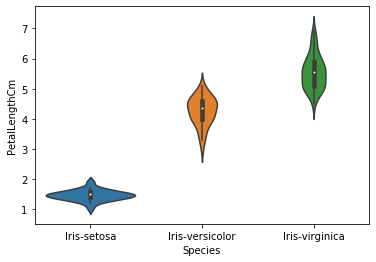

In [16]:
sb.violinplot(x = "Species", y = "PetalLengthCm", data = iris, size = 6)

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


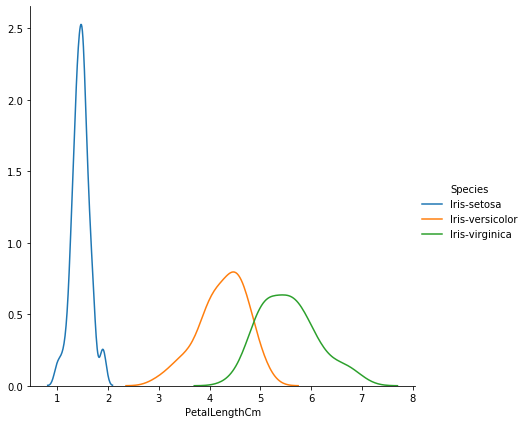

In [17]:
sb.FacetGrid(iris, hue = "Species", size = 6) \
   .map(sb.kdeplot, "PetalLengthCm") \
   .add_legend()

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


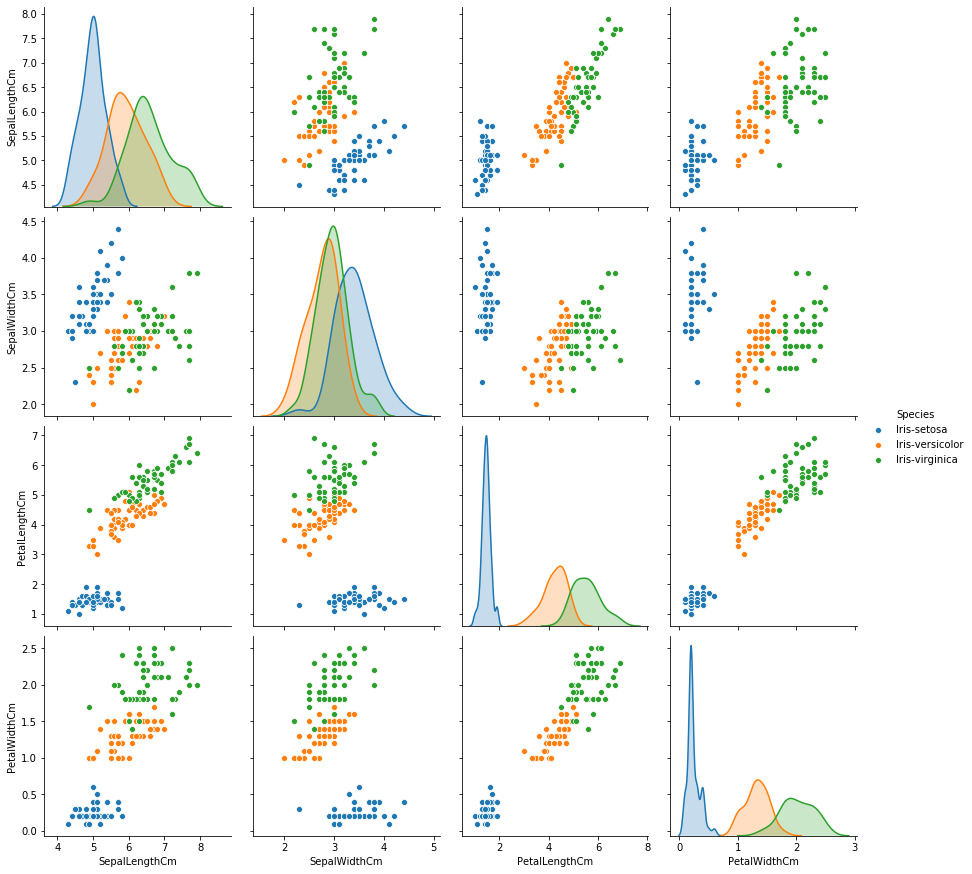

In [18]:
sb.pairplot(iris.drop("Id", axis = 1), hue = "Species", size=3)

## `4.` Applying Decision Tree Algorithm

In [19]:
iris = iris.drop('Id', axis = 1)

In [20]:
X = iris.drop('Species', axis = 1)
y = iris['Species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [23]:
tree_clf = DecisionTreeClassifier()

In [24]:
tree_clf.fit(X_train, y_train)
print('Training Completed')

Training Completed


In [25]:
y_pred = tree_clf.predict(X_test)

In [26]:
comparing = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparing

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica


In [34]:
from sklearn.tree import plot_tree

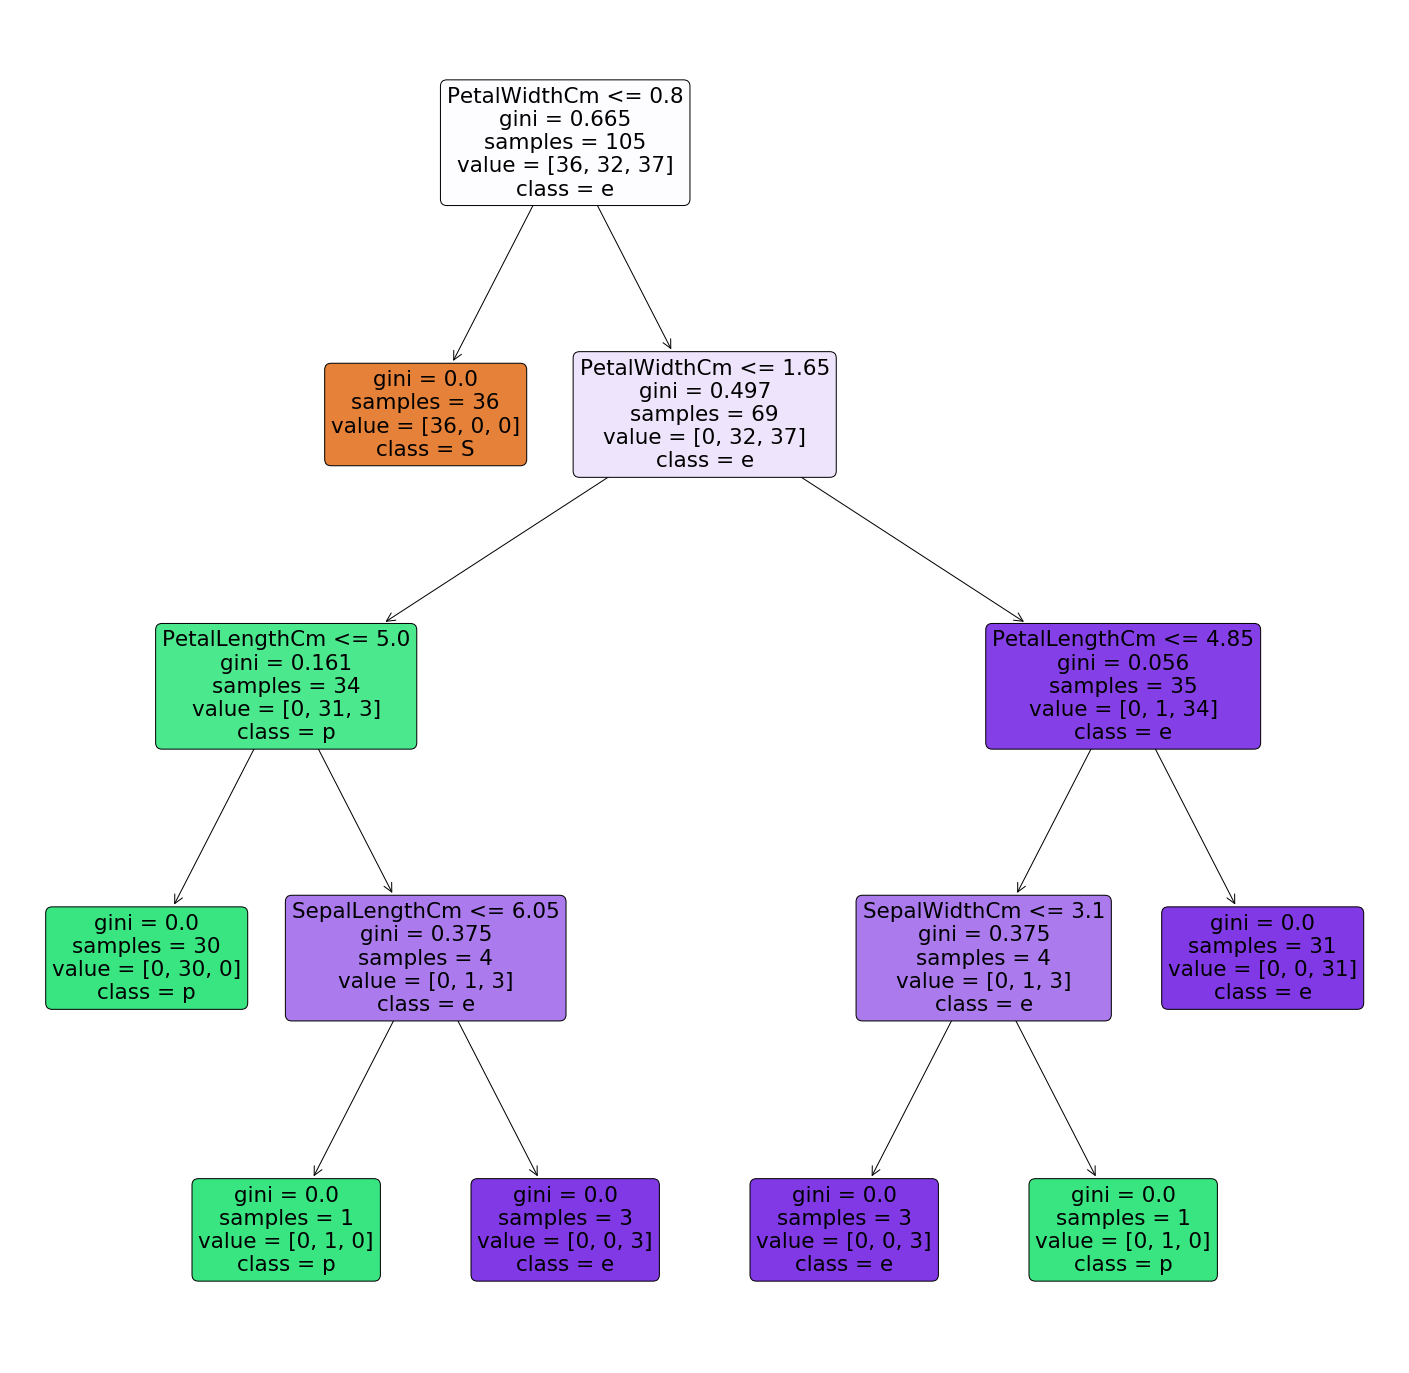

In [39]:
fig = plt.figure(figsize = (25, 25))
plot_tree(tree_clf, 
          feature_names = X.columns,
          class_names = 'Species',
          filled = True,
          rounded = True)

plt.show()

In [40]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
